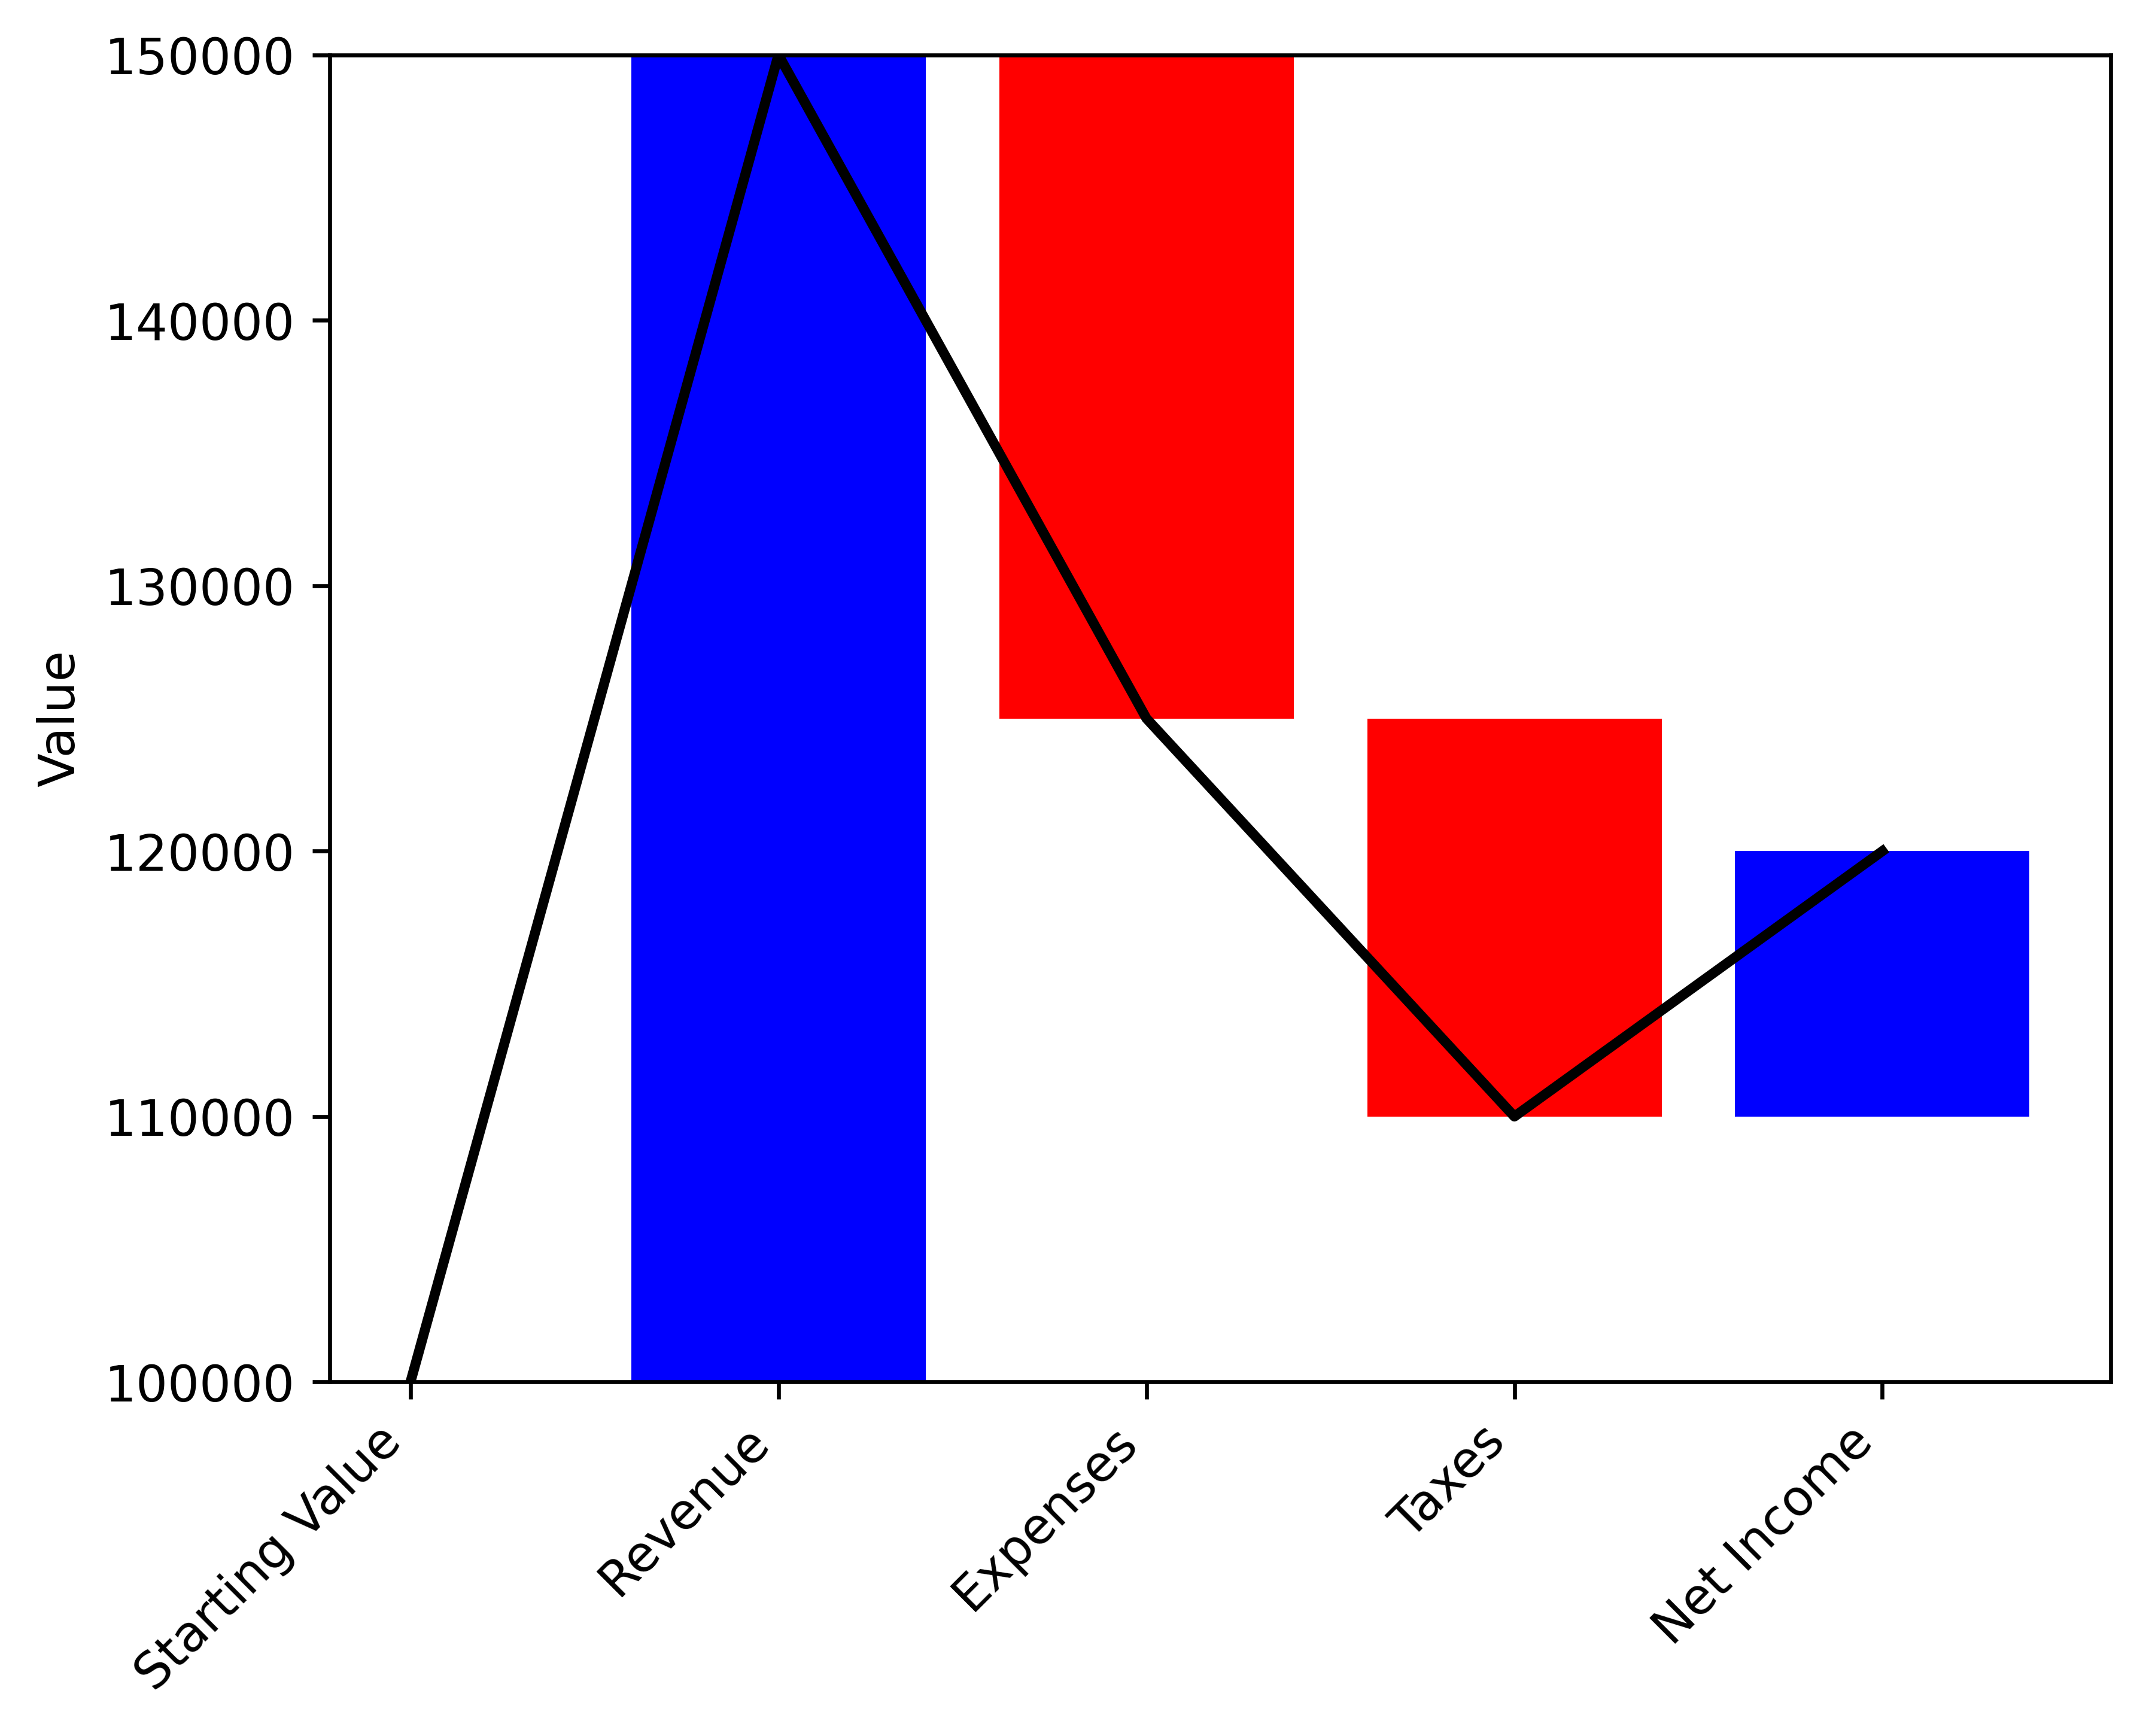

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    'Category': ['Starting Value', 'Revenue', 'Expenses', 'Taxes', 'Net Income'],
    'Value': [100000, 50000, -25000, -15000, 10000]
}

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the cumulative sum of values for the waterfall
df['Total'] = df['Value'].cumsum()

# Create the waterfall plot
fig, ax = plt.subplots()

# Plot the bars
ax.bar(df.index, df['Value'], bottom=df['Total'].shift(1), color=['blue' if x > 0 else 'red' for x in df['Value']])

# Plot the total line
ax.plot(df.index, df['Total'], color='black', linewidth=2)

# Customize the plot
ax.set_xticks(df.index)
ax.set_xticklabels(df['Category'], rotation=45, ha='right')
ax.set_ylabel('Value')

# Annotate the bars with values
#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

plt.gcf().set_dpi(600)
plt.show()

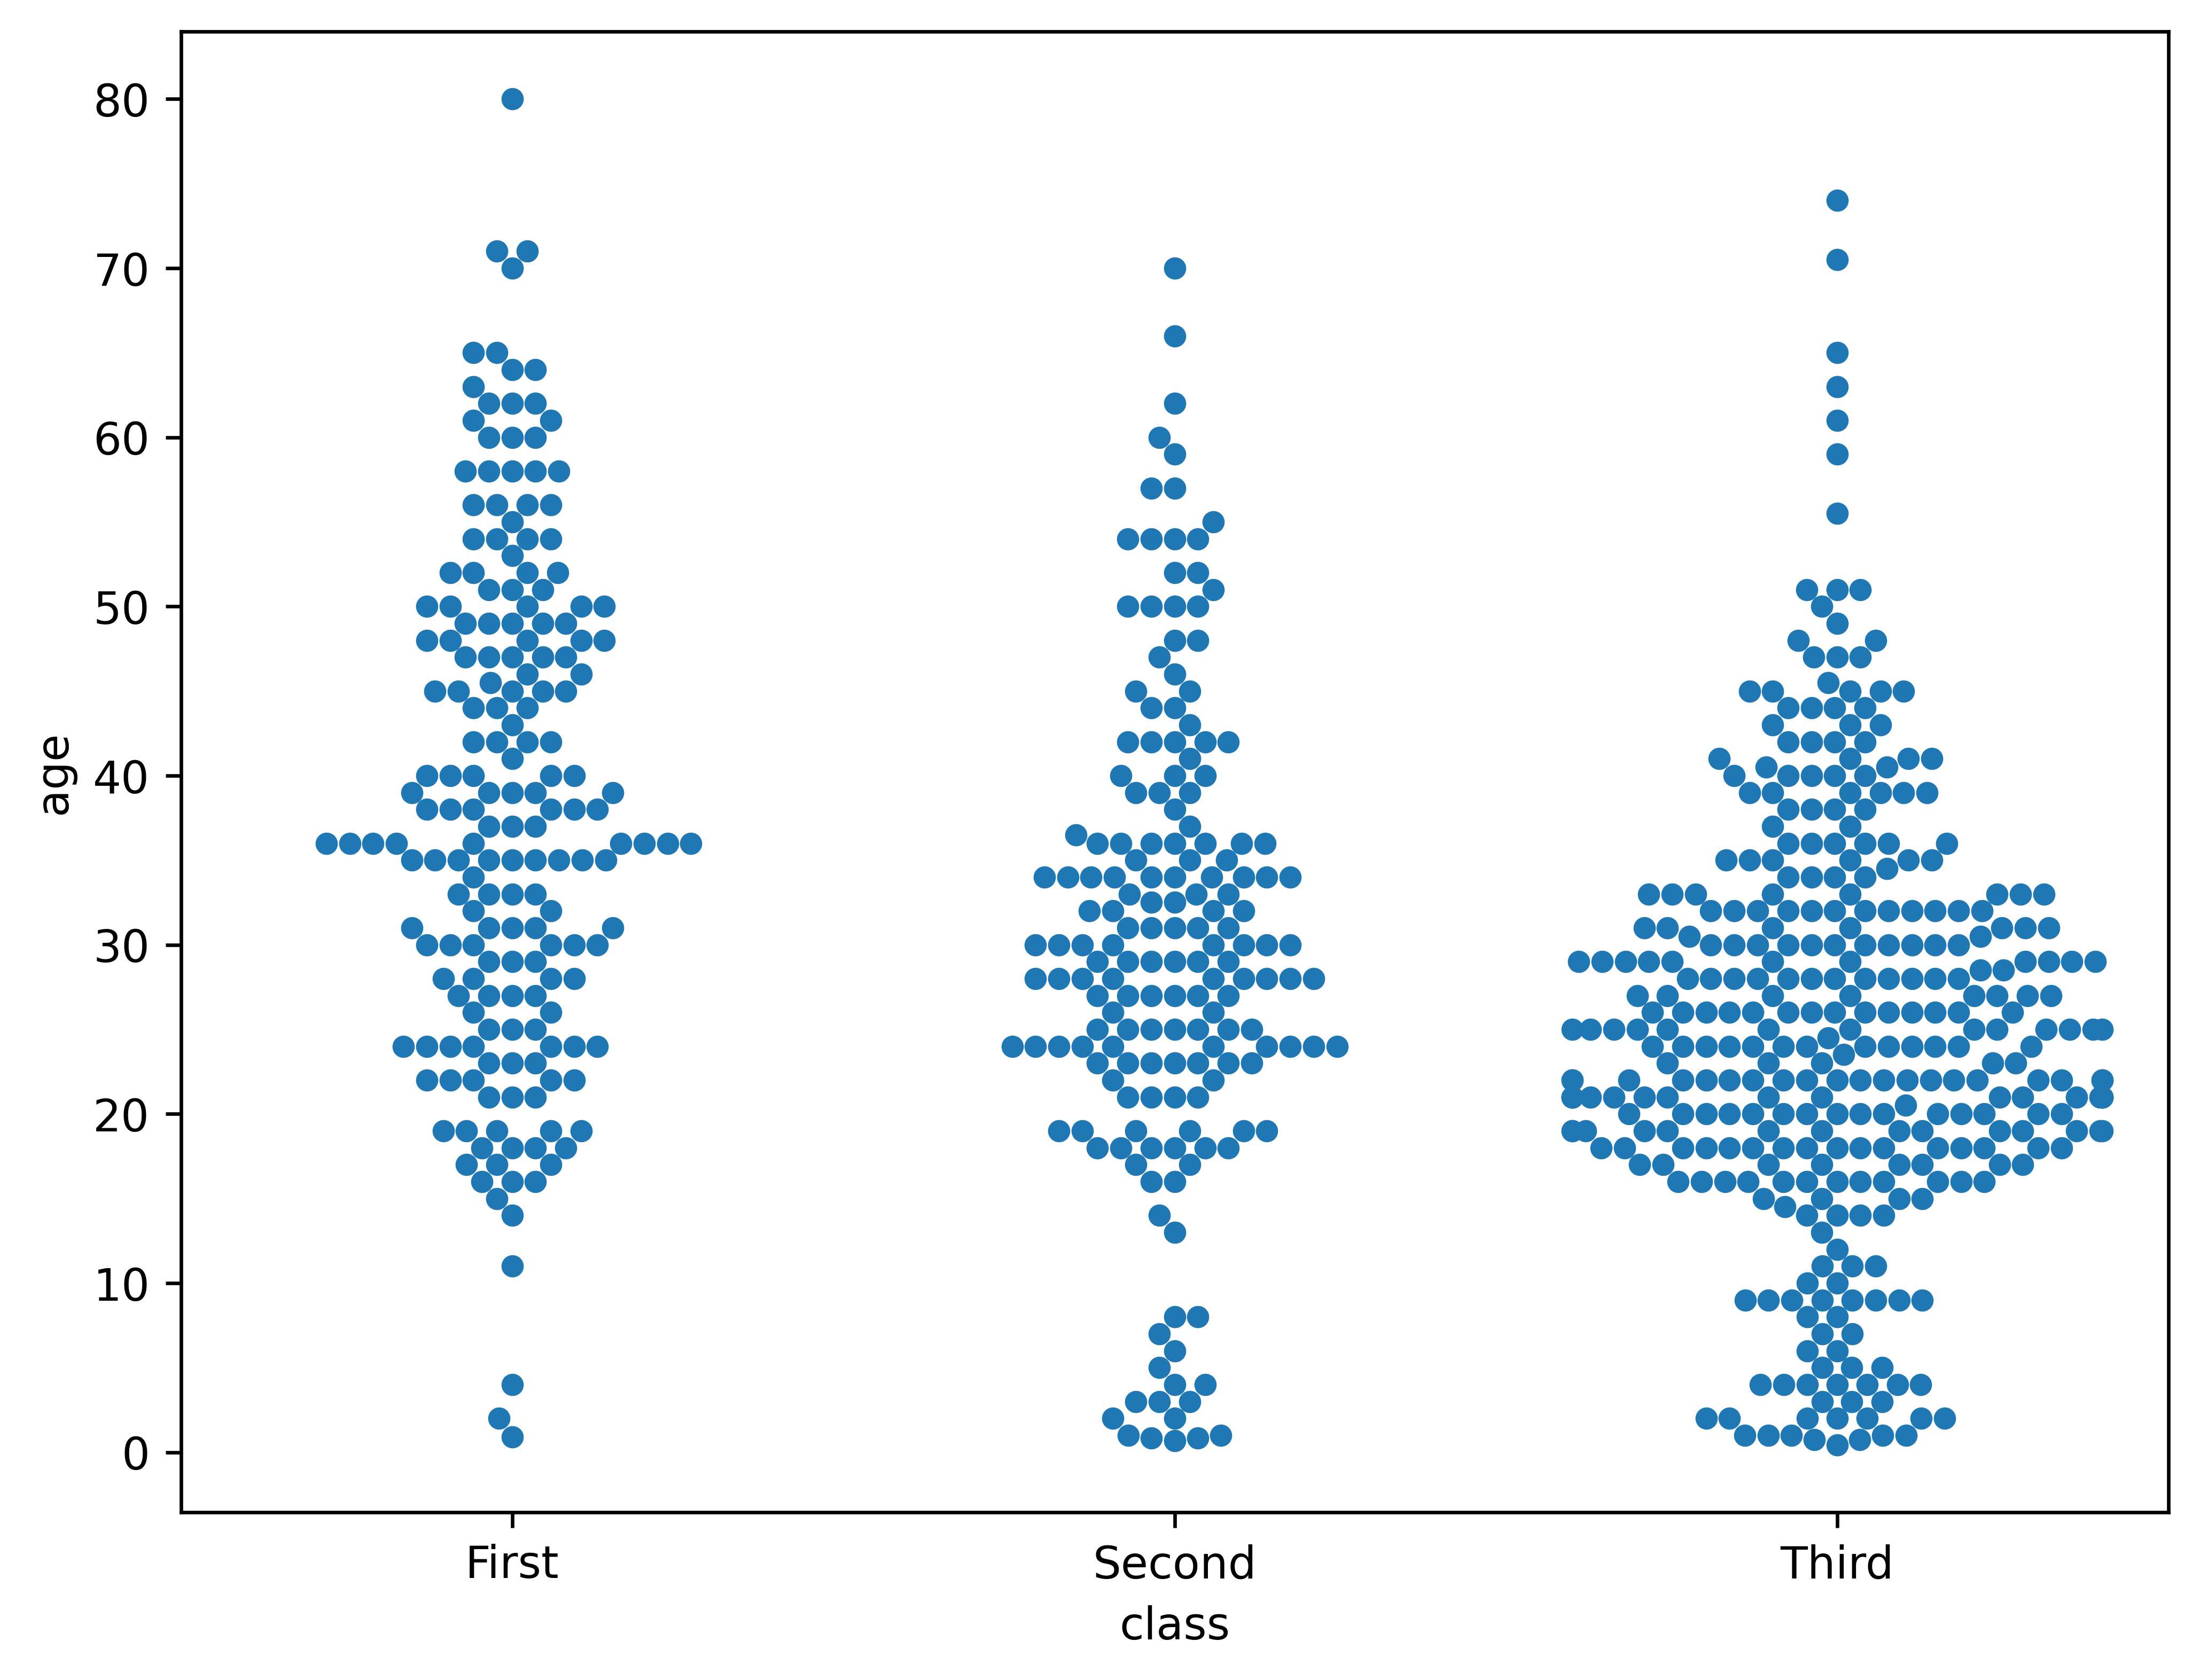

In [20]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing 'age' or 'class' data
df = df.dropna(subset=['age', 'class'])

# Create a beeswarm plot
plt.figure(figsize=(8,6))
sns.swarmplot(x='class', y='age', data=df)

# Show the plot
plt.gcf().set_dpi(600)
plt.show()



In [6]:
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.0/97.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 7.6 MB/s eta 0:00:00


In [28]:
# import the library
import folium

# Make an empty map
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# Show the map
m



In [40]:
# Import the pandas library
import pandas as pd

# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-35.6892, 48.2082,  31.52,  49.21, 49.39, 39.46, 40.41, 52.04, 51.50, 33.98, 43.70, 42.36  ],
   'lon':[ 51.3890, 16.3738, 74.35,  18.74, 8.67,  0.37,  3.70,  0.75,  -0.12,  -117.37, -72.28, -71.05 ],
   'name':['Tehran', 'Vienna', 'Lahore' , 'Zilina', 'Heidelberg', 'Valencia', 'Madrid', 'Milton Keynes', 'London', 'Riverside,CA', 'Hanover,NH', 'Boston'],
   'value':[16, 5, 1, 1, 5, 14, 5, 15, 12, 15,15, 5]
})

data2 = pd.DataFrame({
   'lat':[-35.72, 48.2, 42.36  ],
   'lon':[-51.33, 16.37, -71.05 ],
   'name':['Tehran', 'Vienna','Boston'],
   'value':[10, 5, 14]
})
data2


,lat,lon,name,value
0,-35.72,-51.33,Tehran,10
1,48.20,16.37,Vienna,5
2,42.36,-71.05,Boston,14


In [41]:
import math
# add marker one by one on the map, and account for Mercator deformation
for city in data.itertuples():
    local_deformation = math.cos(city.lat * math.pi / 180)
    folium.Circle(
        location=[city.lat, city.lon],
        popup='%s (%.1f)' % (city.name, city.value),
        radius=city.value * 20000.0 * local_deformation,
        color='crimson',
        fill=True,
        fill_color='crimson'
    ).add_to(m)

# Show the map again
m